<a href="https://colab.research.google.com/github/Gaythri-Prabha/Employee-Data-Analysis-Project/blob/main/capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns


In [13]:
df=pd.read_excel('/content/myexcel.xlsx')

In [14]:
print(df['Height'].head())


0    2023-02-06 00:00:00
1    2023-06-06 00:00:00
2    2023-05-06 00:00:00
3    2023-05-06 00:00:00
4    2023-10-06 00:00:00
Name: Height, dtype: object


#####replacing height with random number between 150 and 180

In [15]:
df['Height'] = np.random.randint(150, 181, size=len(df))
print(df['Height'].head())

0    162
1    163
2    174
3    172
4    157
Name: Height, dtype: int64


In [16]:
print('Missing values')
print(df.isnull().sum())

Missing values
Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64


In [11]:
print(df.duplicated().sum())

0


In [12]:
print(df.describe())

           Number         Age      Height      Weight        Salary
count  458.000000  458.000000  458.000000  458.000000  4.470000e+02
mean    17.713974   26.934498  165.061135  221.543668  4.833970e+06
std     15.966837    4.400128    9.194029   26.343200  5.226620e+06
min      0.000000   19.000000  150.000000  161.000000  3.088800e+04
25%      5.000000   24.000000  157.000000  200.000000  1.025210e+06
50%     13.000000   26.000000  165.000000  220.000000  2.836186e+06
75%     25.000000   30.000000  173.000000  240.000000  6.500000e+06
max     99.000000   40.000000  180.000000  307.000000  2.500000e+07


In [17]:
df['College'].fillna('Unknown', inplace=True)
print(df['College'].head())

0                Texas
1            Marquette
2    Boston University
3        Georgia State
4              Unknown
Name: College, dtype: object


In [18]:
print(df['Salary'].median)

<bound method Series.median of 0      7730337.0
1      6796117.0
2            NaN
3      1148640.0
4      5000000.0
         ...    
453    2433333.0
454     900000.0
455    2900000.0
456     947276.0
457     947276.0
Name: Salary, Length: 458, dtype: float64>


#####replacing missing values with median in salary column

In [20]:
df['Salary'].fillna(df['Salary'].median(), inplace=True)


In [21]:

print(df.isnull().sum())

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64


In [23]:
print(df['Salary'].head())

0    7730337.0
1    6796117.0
2    2836186.0
3    1148640.0
4    5000000.0
Name: Salary, dtype: float64


#####The distribution of employees across each team and calculate the percentage split relative to the total number of employees.


In [35]:
team_count = df['Team'].value_counts()
print(team_count)

Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64


In [37]:
team_percentage = (team_count / len(df)) * 100
print(team_percentage)

Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz                 3.493450
New York Knicks           3.493450
Milwaukee Bucks           3.493450
Brooklyn Nets             3.275109
Portland Trail Blazers    3.275109
Oklahoma City Thunder     3.275109
Denver Nuggets            3.275109
Washington Wizards        3.275109
Miami Heat                3.275109
Charlotte Hornets         3.275109
Atlanta Hawks             3.275109
San Antonio Spurs         3.275109
Houston Rockets           3.275109
Boston Celtics            3.275109
Indiana Pacers            3.275109
Detroit Pistons           3.275109
Cleveland Cavaliers       3.275109
Chicago Bulls             3.275109
Sacramento Kings          3.275109
Phoenix Suns              3.275109
Los Angeles Lakers        3.275109
Los Angeles Clippers      3.275109
Golden State Warriors     3.275109
Toronto Raptors           3.275109
Philadelphia 76ers        3.275109
Dallas Mavericks          3.275109
Orlando Magic  

#####Barplot representing number of members in each team and its percentage

<ipython-input-38-765fe8a8acb2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_count.index, y=team_count.values, palette='plasma')
<ipython-input-38-765fe8a8acb2>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, count + 0.2, f'{team_percentage[i]:.2f}%', ha='center', va='bottom')


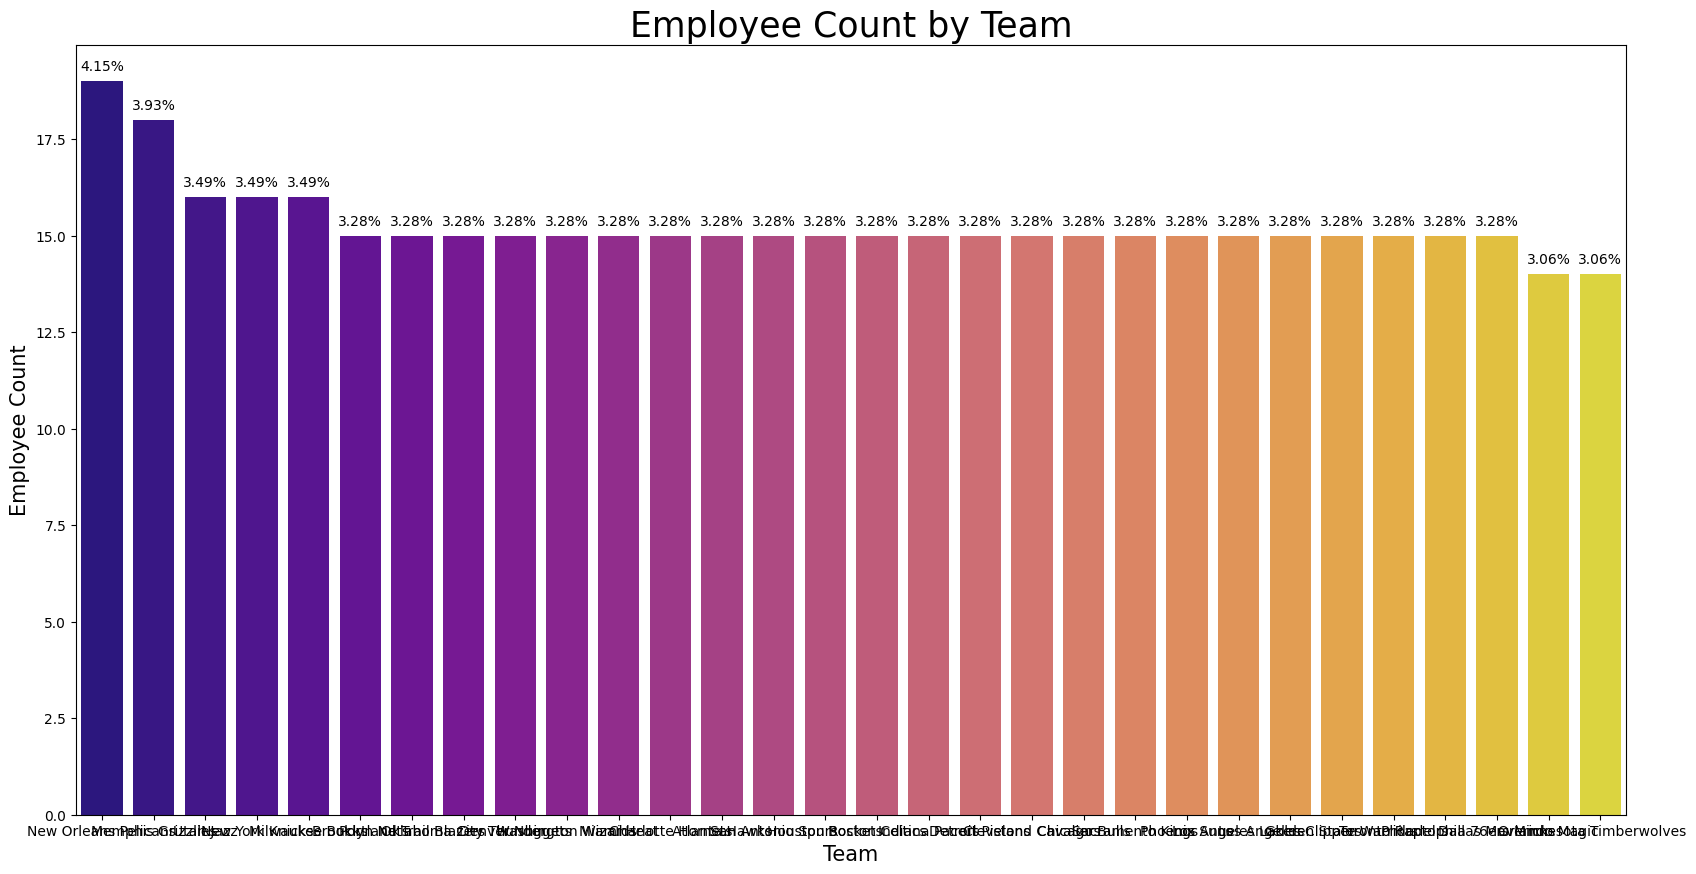

In [38]:
plt.figure(figsize=(20,10))
sns.barplot(x=team_count.index, y=team_count.values, palette='plasma')
plt.title('Employee Count by Team',fontsize=25)
plt.xlabel('Team',fontsize=15)
plt.ylabel('Employee Count',fontsize=15)
for i, count in enumerate(team_count):
    plt.text(i, count + 0.2, f'{team_percentage[i]:.2f}%', ha='center', va='bottom')
plt.show()


plt.show()

#####2. Segregate employees based on their positions within the company.

In [40]:
position_count = df['Position'].value_counts()
print(position_count)

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


#####Piechart representing Employee distribution by position

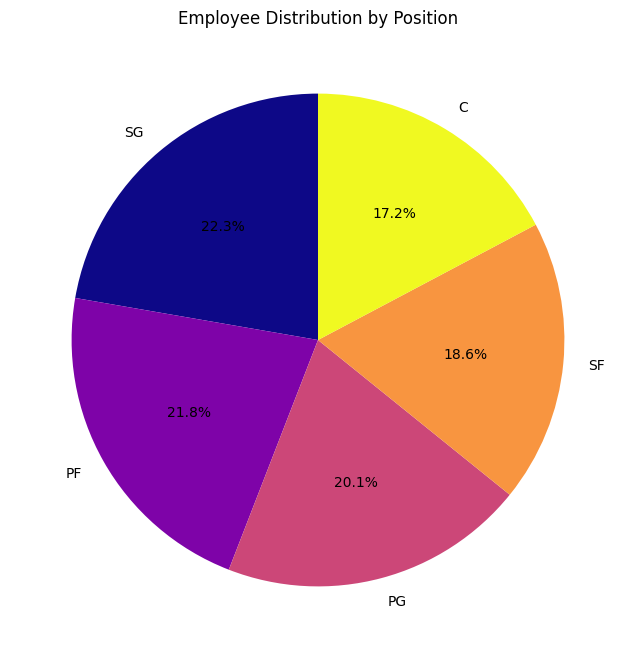

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


position_count = df['Position'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(position_count, labels=position_count.index, autopct='%1.1f%%',colors=plt.cm.plasma(np.linspace(0, 1, len(position_count))), startangle=90)
plt.title('Employee Distribution by Position')
plt.ylabel('')
plt.show()


#####3. Identify the predominant age group among employees.

In [24]:
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [25]:
age_group_count = df['age_group'].value_counts()
print(age_group_count)

age_group
20-30    334
30-40    119
40-50      3
50-60      0
60-70      0
Name: count, dtype: int64


#####Piechart representing age group distribution among employees

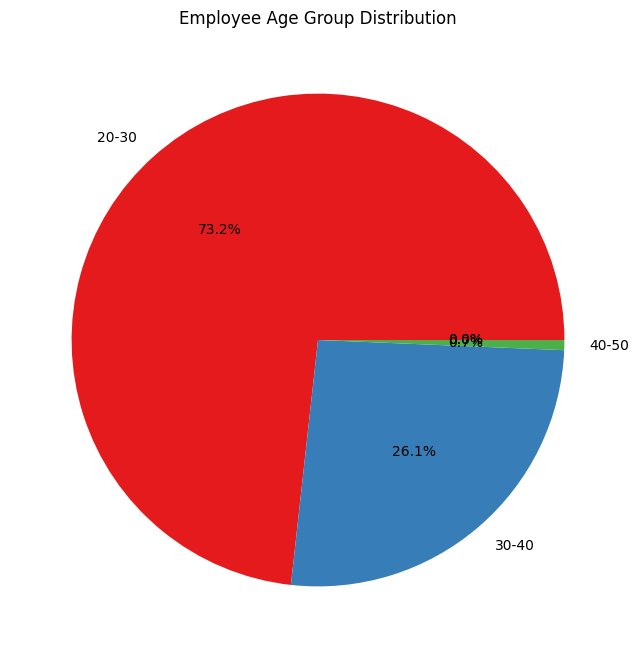

In [28]:
age_group_count.plot(kind='pie', autopct='%1.1f%%', figsize=(8,8), colors=sns.color_palette('Set1'))
plt.title('Employee Age Group Distribution')
plt.ylabel('')
plt.show()

#####4. Discover which team and position have the highest salary expenditure.

#####stacked bar chart representing total salary expenditure by team and position.

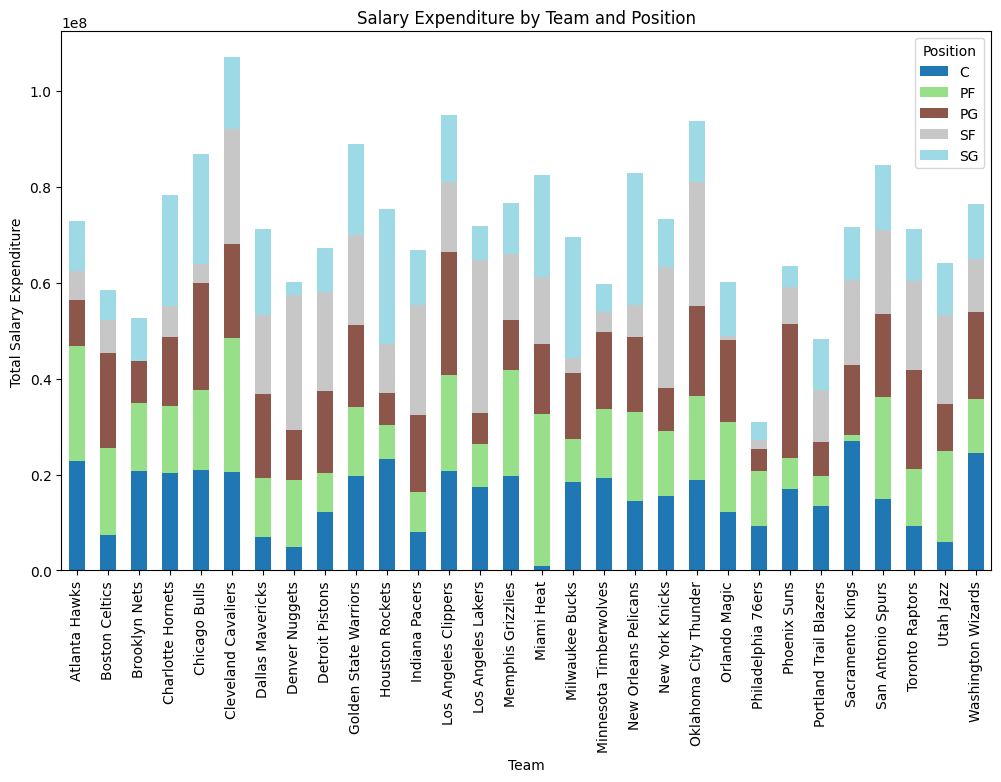

In [22]:
salary_pivot = df.pivot_table(values='Salary', index='Team', columns='Position', aggfunc='sum')


salary_pivot.plot(kind='bar', stacked=True, figsize=(12,7), cmap='tab20')
plt.title('Salary Expenditure by Team and Position')
plt.xlabel('Team')
plt.ylabel('Total Salary Expenditure')
plt.show()

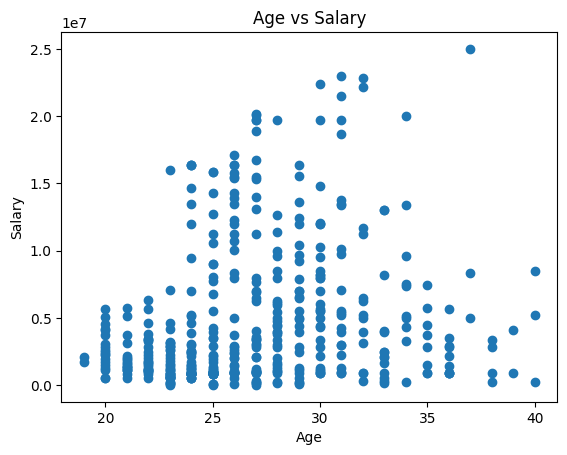

In [31]:
plt.scatter(df['Age'], df['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary')
plt.show()

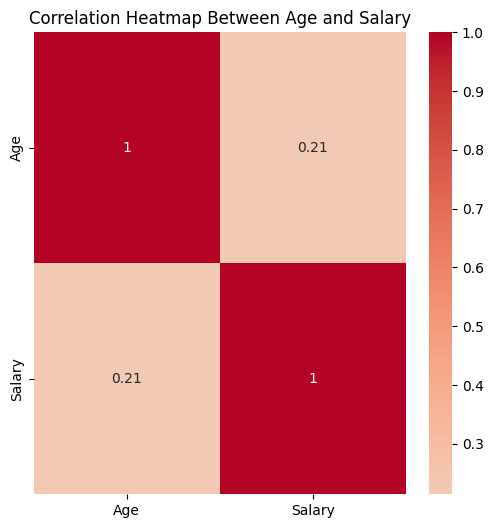

In [33]:
correlation_matrix = df[['Age', 'Salary']].corr()


plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap Between Age and Salary')
plt.show()

In [43]:
print(df)

              Name            Team  Number Position  Age  Height  Weight  \
0    Avery Bradley  Boston Celtics       0       PG   25     162     180   
1      Jae Crowder  Boston Celtics      99       SF   25     163     235   
2     John Holland  Boston Celtics      30       SG   27     174     205   
3      R.J. Hunter  Boston Celtics      28       SG   22     172     185   
4    Jonas Jerebko  Boston Celtics       8       PF   29     157     231   
..             ...             ...     ...      ...  ...     ...     ...   
453   Shelvin Mack       Utah Jazz       8       PG   26     156     203   
454      Raul Neto       Utah Jazz      25       PG   24     154     179   
455   Tibor Pleiss       Utah Jazz      21        C   26     165     256   
456    Jeff Withey       Utah Jazz      24        C   26     153     231   
457       Priyanka       Utah Jazz      34        C   25     172     231   

               College     Salary age_group  
0                Texas  7730337.0     20-

In [44]:
df.to_excel('cleaned_data.xlsx', index=False)
